# Kapittel 16

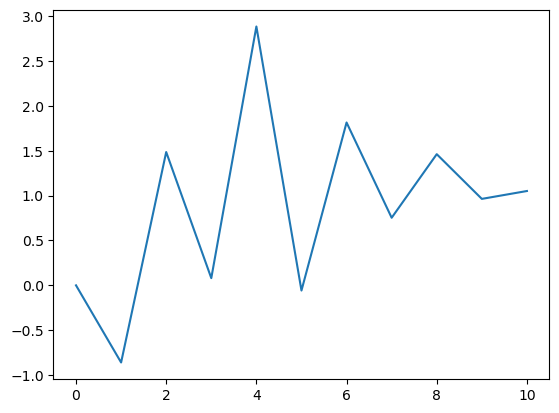

In [2]:
# EndelegDiffOrden1.m

import numpy as np
np.set_printoptions(linewidth=400)
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
import matplotlib.pyplot as plt
from sympy import Matrix

# Skript som løyser startverdiproblemet
# a(x) y' + b(x) y = c(x), y(x_0)=y_0.
# Skriptet brukar endeleg differanse-formlar for
# numeriske deriverte til å sette opp problemet
# som ei matriselikning.
# Input:
#   1) Funksjonane a(x), b(x) og c(x)
#   2) Startkravet, x0 og y0
#   3) Maksimalverdi for x, xF
#   4) Talet på delintervall, N
# Til den siste variabelen brukar vi input-funksjonen.
# Dei andre er hardkoda.

# Inputvariablar
x0 = 0
y0 = 0
xF = 10
# Gir oppdelinga av x-intervallet
#N=input('Gi talet på delintervall: ')
N = 10

# Funksjonar
def a(x):
    return np.log(x+1)
    
def b(x):
    return np.exp(-x)
    
def c(x):
    return np.sin(x**2/5)

# Vektor med x-verdiar
h = (xF-x0)/N
xVektor = np.arange(x0+h, xF+h, h)

# Matriser og vektor for funksjonane
Amat = np.diag(a(xVektor))
Bmat = np.diag(b(xVektor))
Cvektor = c(xVektor).transpose()

# Matrise for den deriverte
# Brukar midtpunktsformelen for numerisk derivasjon
D1Mat = np.zeros((N, N))
for ind in range(1, N-1):
  D1Mat[np.ix_([ind], [ind-1, ind+1])] = np.array([-1, 1])/(2*h)
# Derivert i venstre ende
D1Mat[0, 1] = 1/(2*h)
# Derivert i høgre ende
D1Mat[N-1, (N-3):N] = np.array([1, -4, 3])/(2*h)

# Set opp totalmatrisa
TotMat =  np.c_[(np.matmul(Amat, D1Mat)+Bmat), Cvektor]
# Legg til startkravet
TotMat[0,N] = TotMat[0,N] + a(x0+h) * y0/(2*h)

# Løyser likningssystemet
TotMatS = Matrix(TotMat)
auxS = TotMatS.rref()[0]
aux = np.array(auxS).astype(np.float64)
yVektor = aux[:, N].transpose()
# Tar med utgangspunktet
yVektor =  np.insert(yVektor, 0, y0)
xVektor =  np.insert(xVektor, 0, x0)

# Plottar løysinga
plt.plot(xVektor, yVektor)


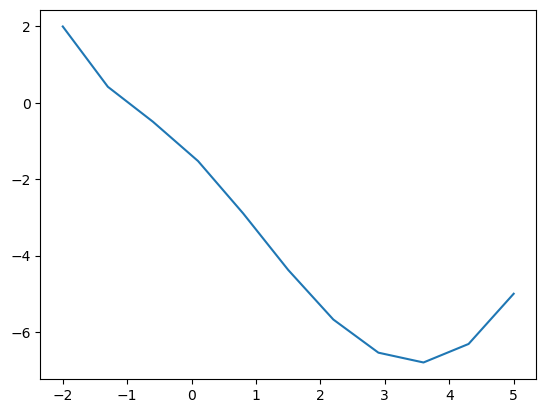

In [22]:
# EndelegDiffOrden2Rand.m

# Skript som løyser randverdiproblemet
# a(x) y'' + b(x) y' + c(x) y = d(x) med
# y(x_0)=y_0 og y(x_f)=y_f.
# Skriptet brukar endeleg differanse-formlar for
# numeriske deriverte til å sette opp problemet
# som ei matriselikning.
# Input:
#   1) Funksjonane a(x), b(x), c(x) og d(x)
#   2) Verdiane for x_0 og x_f
#   3) Randkrava y(x_0) og y(x_f)
#   4) Talet på delintervall, N
# Til den siste variabelen brukar vi input-funksjonen.
# Dei andre er hardkoda.

# Inputvariablar
x0 = -2
y0 = 2
xF = 5
yF = -5
# Gir oppdelinga av x-intervallet
#N=input('Gi talet på delintervall: ')
N = 10

# Funksjonar
def a(x):
    return np.exp(x)
    
def b(x):
    return x
    
def c(x):
    return -2*x**0

def d(x):
    return 2*np.exp(x)-x

# Vektor med x-verdiar
h = (xF-x0)/N
xVektor = np.arange(x0+h, xF, h)

# Matriser og vektor for funksjonane
Amat = np.diag(a(xVektor))
Bmat = np.diag(b(xVektor))
Cmat = np.diag(c(xVektor))
Dvektor = d(xVektor).transpose()

# Matriser for dei deriverte
D1Mat = np.zeros((N-1, N-1))
D2Mat = np.zeros((N-1, N-1))
for ind in range(1, N-2):
  D1Mat[np.ix_([ind], [ind-1, ind+1])] = np.array([-1, 1])/(2*h)
  D2Mat[np.ix_([ind], [ind-1, ind, ind+1])] = np.array([1, -2, 1])/h**2

# Derivert i venstre ende
D1Mat[0, 1] = 1/(2*h)
# Derivert i høgre ende
D1Mat[N-2, N-3] = -1/(2*h)
# Dobbeltderivert i venstre ende
D2Mat[0, 0:2] = np.array([-2, 1])/h**2
# Dobbeltderivert i høgre ende
D2Mat[N-2, (N-3):(N-1)] = np.array([1, -2])/h**2

# Set opp totalmatrisa
TotMat = np.c_[np.matmul(Amat, D2Mat)+np.matmul(Bmat, D1Mat)+Cmat, Dvektor]

# Legg til randkrava
TotMat[0, N-1] = TotMat[0, N-1] + y0*(-a(x0+h)/h**2+b(x0+h)/(2*h))
TotMat[N-2, N-1] = TotMat[N-2, N-1] - yF*(a(xF-h)/h**2+b(xF-h)/(2*h))

# Løyser likningssystemet
TotMatS = Matrix(TotMat)
auxS = TotMatS.rref()[0]
aux = np.array(auxS).astype(np.float64)
yVektor = aux[:, N-1].transpose()
# Tar med randpunkta
yVektor = np.concatenate([[y0], yVektor, [yF]])
xVektor = np.concatenate([[x0], xVektor, [xF]])

# Plottar løysinga
plt.plot(xVektor, yVektor)


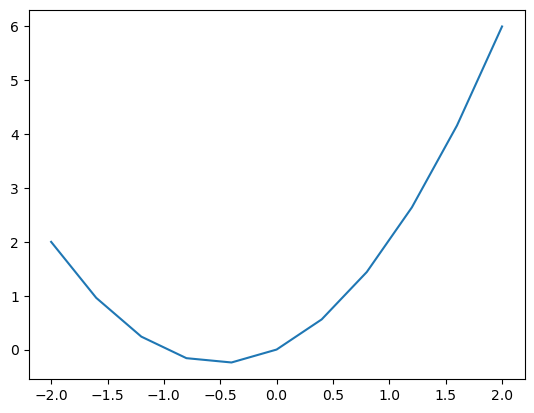

In [53]:
# EndelegDiffOrden2Start.m

# Skript som løyser startverdiproblemet
# a(x) y' + b(x) y = c(x), y(x_0)=y_0, y'(x_0)=yd.
# Skriptet brukar endeleg differanse-formlar for
# numeriske deriverte til å sette opp problemet
# som ei matriselikning.
# Input: 
#   1) Funksjonane a(x), b(x) og c(x)
#   2) Verdiane for x_0 og x_f, der x_f er maksimal x-verdi
#   3) Startkrava y(x_0) og y'(x_0)
#   4) Talet på delintervall, N
# Til den siste variabelen brukar vi input-funksjonen. 
# Dei andre er hard-koda.

# Input-variable
x0 = -2
y0 = 2
xF = 2 
yD = -3
# Gir oppdelinga av x-intervallet
#N=input('Gi talet på delintervall: ')  
N = 10

# Funksjonar
def a(x):
    return np.exp(x)
    
def b(x):
    return x
    
def c(x):
    return -2*x**0

def d(x):
    return 2*np.exp(x)-x

# Vektor med x-verdiar
h = (xF-x0)/N
xVektor = np.arange(x0+h, xF, h)

# Matriser og vektor for funksjonane
Amat = np.diag(a(xVektor))
Bmat = np.diag(b(xVektor))
Cmat = np.diag(c(xVektor))
Cmat = np.c_[Cmat, np.zeros((N-1, 1))]   # Utvidar Cmatrisa
Dvektor = d(xVektor).transpose()

# Matriser for dei deriverte
# Brukar midpunktformelen for numerisk derivasjon
D1Mat = np.zeros((N-1, N))
D2Mat = np.zeros((N-1, N))
for ind in range(1, N-2):
  D1Mat[np.ix_([ind], [ind-1, ind+1])] = np.array([-1, 1])/(2*h)
  D2Mat[np.ix_([ind], [ind-1, ind, ind+1])] = np.array([1, -2, 1])/h**2

# Derivert i venstre ende
D1Mat[0, 1] = 1/(2*h)
# Derivert i høgre ende
D1Mat[N-2, [(N-3), (N-1)]] = np.array([-1, 1])/(2*h)         
# Dobbelt-derivert i venstre ende
D2Mat[0, 0:2] = np.array([-2, 1])/h**2
# Dobbelt-derivert i høgre ende
D2Mat[N-2, (N-3):N] = np.array([1, -2, 1])/h**2     

# Set opp totalmatrisa
TotMat = np.c_[np.matmul(Amat, D2Mat)+np.matmul(Bmat, D1Mat)+Cmat, Dvektor]
# Legg til startkravet på y(x_0)
TotMat[0, N] = TotMat[0, N] + y0*(-a(x0+h)/h**2+b(x0+h)/(2*h))
# Legg til startkravet på y'(x_0)
TotMat = np.r_[TotMat, np.zeros((1, N+1))]
TotMat[N-1, 0:2] = np.array([4, -1])/(2*h)
TotMat[N-1, N] = yD + 3/(2*h)*y0

# Løyser likningssystemet
TotMatS = Matrix(TotMat)
auxS = TotMatS.rref()[0]
aux = np.array(auxS).astype(np.float64)
yVektor = aux[:, N].transpose()
# Tar med randpunkta
yVektor = np.concatenate([[y0], yVektor])
xVektor = np.concatenate([[x0], xVektor, [xF]])

# Plottar løysinga
plt.plot(xVektor, yVektor)
